<a href="https://colab.research.google.com/github/Sarzy92/AI_Machine_Learning/blob/main/Classification_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **South African Language Identification Hack 2022**
EDSA 2201 & 2207 classification hackathon
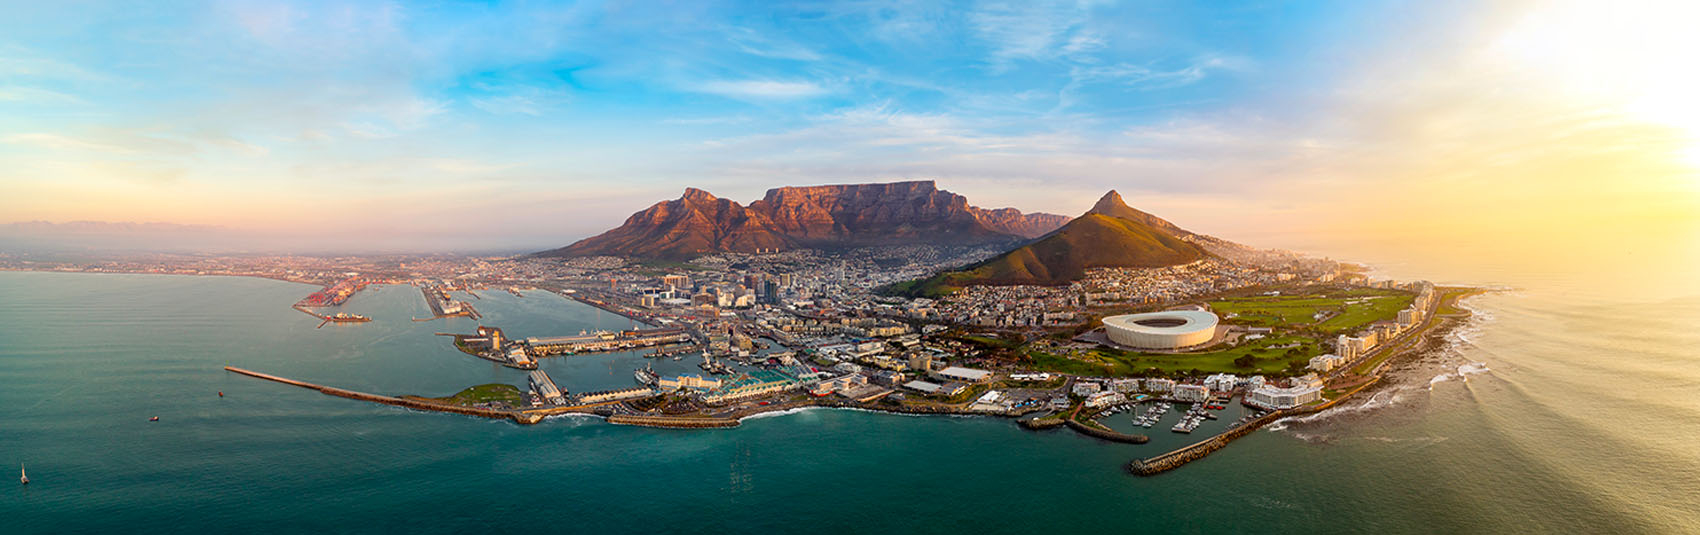

# **Table of Content**
>**Overview**

> **Data Description**

>> *   Language IDs

> **Loading Data**

>> *   Import Libraries
* Load/Read Datasets

>**Explore the Basic Properties of the Dataset**

>> *   Shape of Datasets
*   Checking for Missing Values in Datasets
* Check the Duplicated Reviews
*Analyze the Classes (lang_id)
*Analyze Reviews (text)

> **Exploratory Data Analysis (EDA)**

>>*   Preprocessing  for EDA
*   EDA 

> **Data Processing/Engineering**
* Split Train 

> **Modelling**


>>  
*   Multinomial Naives Bayes
*   Random Forest Classifier
*   Support Vector Machine Classifier
*   XGBOOST Classifier

> **Conclusion**



















# **Overview**

>South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society. 

>The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
[From South African Government](https:/https://www.gov.za/about-sa/south-africas-people)

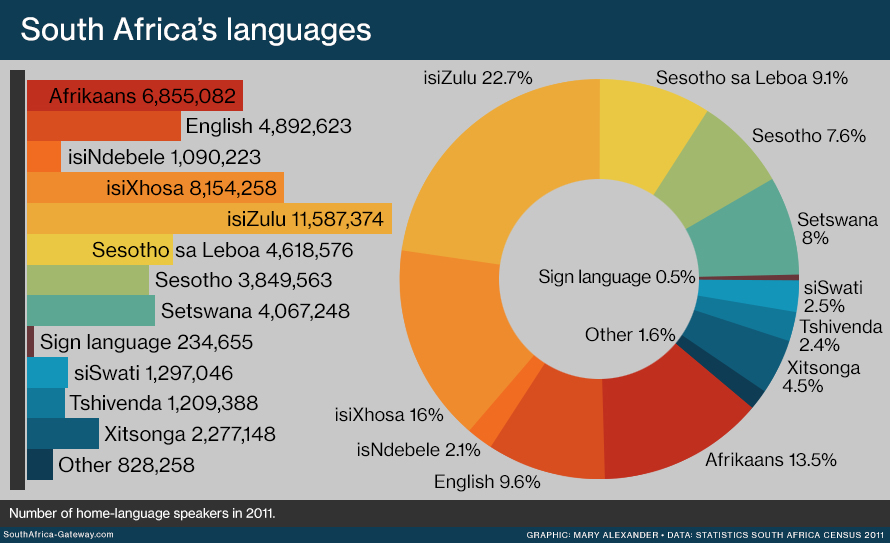

# **Data Decription**
 
>The dataset used for this challenge is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt. 

>The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

* Language IDs

>>
1.   afr - Afrikaans
2. eng - English
3. nbl - isiNdebele
4. nso - Sepedi
5. sot - Sesotho
6. ssw - siSwati
7. tsn - Setswana
8. tso - Xitsonga
9. ven - Tshivenda
10. xho - isiXhosa
11. zul - isiZulu

All 11 official languages as discussed are well represented in the Language Id

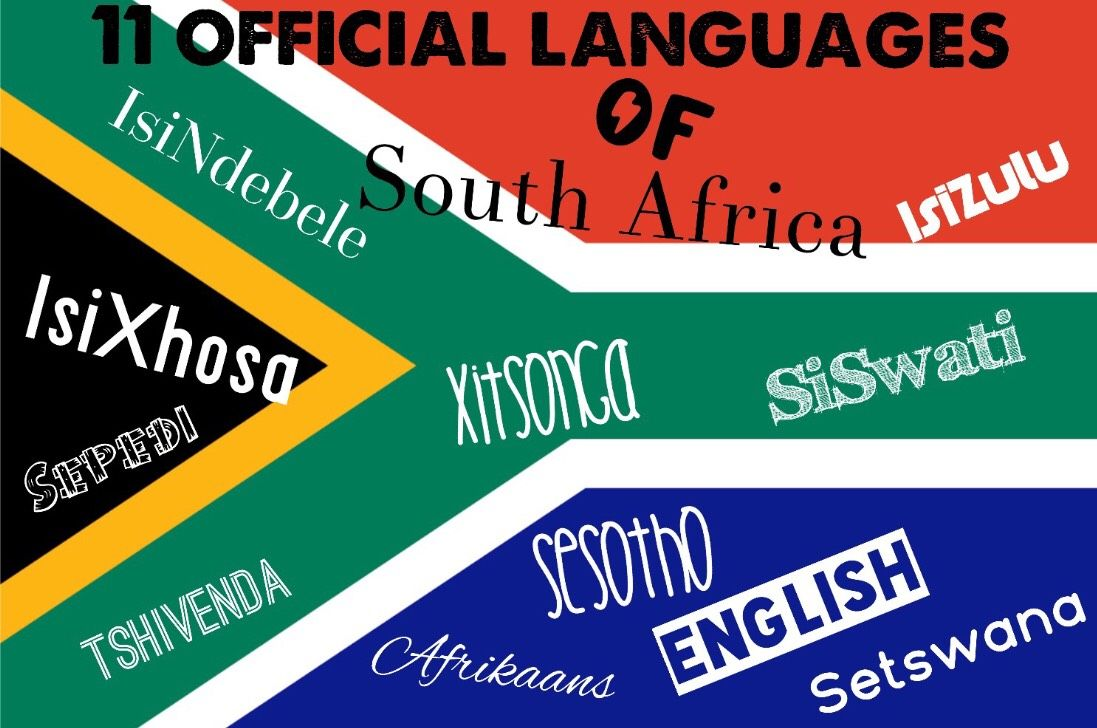

# **Loading Data**

>In this section we: 

>>imported the various libraries used for: reading our dataset, cleaning, preprocessing, exploratory data analysis and modelling, 

>>upload and loaded the train and test  dataset into our COLAB IDE,

>>and read our datasets for further study.

## **Import Libraries**

In [35]:
import numpy as np # For arithmetics and arrays
import math # For inbuilt math functions
import pandas as pd # For handling data frames
import collections # used for dictionaries and counters
from itertools import permutations # used to find permutations

#for EDA
import seaborn as sns # Create plots
sns.set(style="ticks")
import matplotlib.pyplot as plt # Create plots

#For preprocessing
import spacy   # Importing spacy
from sklearn.model_selection import train_test_split # Import train_test_split function to easily split data into training and testing samples
from sklearn.feature_extraction.text import CountVectorizer

#models
from sklearn.naive_bayes import MultinomialNB   # Import MultinomialNB
from sklearn.ensemble import RandomForestClassifier #Import RandomForestClassifier
from sklearn import svm #Import Support Vector Machine
import xgboost as xgb   # Import xgboost

#for metrics and evaluation
from sklearn.metrics import classification_report
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#for NLP
from wordcloud import WordCloud # Importing wordcloud for plotting word clouds 
from textwrap import wrap  #textwrap for wrapping longer text
from textblob import TextBlob #import textblob for polarity

#to upload dataset file from your computer to colab ide
from google.colab import files

We successfully imported all the models we will need for this classification. Now let's upload our datasets

## **Load/Read Dataset**

>Here we take a look at our dataset and further study the data set before the next phase of our Language classification analysis 

In [36]:
data = pd.read_csv('/content/train_set.csv') # Read train data
data2 = data.copy()
data.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [37]:
df = pd.read_csv('/content/test_set.csv') # Read test data
df2 = df.copy()
df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


We can see that both dataset has 2 columns but both datasets differs by their first column which is lang_id for train data and index for unseen data(test data). both has the text column.

# **Explore the Basic Properties of the Dataset**

>> *   Shape of Datasets
*   Checking for Missing Values in Datasets
* Check the Duplicated text
*Analyze the Classes (lang_id)
*Analyze Reviews (text)

### **Shape of Datasets**

In [38]:
data.shape #shape of train data

(33000, 2)

In [39]:
df.shape  #shape of test data

(5682, 2)

As seen above; Our train dataset has <b>33000</b> rows and 2 columns while our unseen(test data) dataset has <b>5682</b> rows and same 2 columns as earlier sobserved

### **Checking for Missing Values in Datasets**

In [40]:
data.isnull().sum()

lang_id    0
text       0
dtype: int64

In [41]:
df.isnull().sum()

index    0
text     0
dtype: int64

>Just a prove to the observation made in our data description section above, that, the datasets has gone through some level of cleanliness

### **Check the Duplicated text**
>Let's first find if there are any duplicated records in train data


In [42]:
data.describe(include='all') #check for duplicate entries

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


For lang_id column there are 33000 rows and 11 unique values. However, for text column, there exists 33000 rows of which 29948 entries are unique. That is, for text column, there are some duplications: 33000 - 29948 = 3052

We can verify the duplications:

In [43]:
data.text.duplicated(keep="first").value_counts()  #confirming duplicate entries in our train data

False    29948
True      3052
Name: text, dtype: int64

we will need to remove the duplicated rows from our data. 
>>Duplicate entries are problematic for multiple reasons. First off, when an entry appears more than once, it receives a disproportionate weight during training. Thus models that succeed on frequent entries will look like they perform well, while in reality this is not the case. Additionally, duplicate entries can ruin the split between train, validation and test sets in cases where identical entries are not all in the same set. This can lead to biased performance estimates that will lead to disappointing models in production.[Source](https://deepchecks.com/what-is-data-cleaning/)

In [44]:
data.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True) #remove duplicate entries
data.describe()

,lang_id,text
count,29948,29948
unique,11,29948
top,eng,umgaqo-siseko wenza amalungiselelo kumaziko ax...
freq,2998,1


Before we go we will do the same process for our test data  

In [45]:
df.text.duplicated(keep="first").value_counts() #check and confirm duplicate entries in unseen data

False    5459
True      223
Name: text, dtype: int64

As we can see we have <b>223</b> duplicate entries in our test data

In [46]:
df.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True) #remove duplicate entries from test data
df.text.duplicated(keep="first").value_counts() #confirm removal of duplicate entries

False    5459
Name: text, dtype: int64

We are good to go!!

### **Analyze the Classes (lang_id)**

>*  List of lang_id 



In [47]:
lang_id_list = data.lang_id.unique()
print("Language ID:\n", lang_id_list) #list of languages in the lang_id column

Language ID:
 ['xho' 'eng' 'nso' 'ven' 'tsn' 'nbl' 'zul' 'ssw' 'tso' 'sot' 'afr']


>*   Number of text per lang_id




In [48]:
data.lang_id.value_counts() #The number of text per lang_id:

eng    2998
zul    2924
nso    2873
tsn    2869
sot    2833
tso    2758
xho    2659
afr    2641
ven    2605
ssw    2426
nbl    2362
Name: lang_id, dtype: int64



>*   Plot of Number of text per lang_id



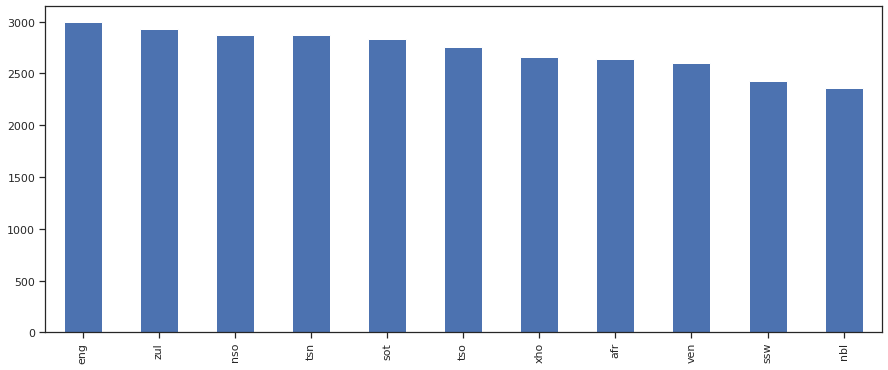

In [49]:
data.lang_id.value_counts().plot.bar(x="Language ID",y="Number of Text",figsize=(15,6) ) #Let's plot the number of text per lang_id as a bar chart:

From the plot above we would clearly see that the <b>English Language</b> with <b>2998</b> has more representation in our data set while <b>IsiNdebele Language</b> has the lowest respresentation with <b>2362</b>

>Also we can argue that the dataset is a balanced one: the number of samples are evenly distrubuted over the lang_id.

### Analyze the Classes (text)

>*   Some text Samples




In [50]:
data.text.head() #get samples of dataset

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object



>*   Check length of words in text




In [51]:
data['words'] = [len(x.split()) for x in data['text'].tolist()]

In [52]:
data[['words','text']].head()

,words,text
0,24,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,31,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,37,the province of kwazulu-natal department of tr...
3,40,o netefatša gore o ba file dilo ka moka tše le...
4,43,khomishini ya ndinganyiso ya mbeu yo ewa maana...


>

*   Summary statistics of words count in text



In [53]:
data['words'].describe()

count    29948.000000
mean        37.449913
std          9.938674
min         14.000000
25%         29.000000
50%         38.000000
75%         45.000000
max         69.000000
Name: words, dtype: float64

>**Note that:** 
1. 75% of the text have more than 40 words.
2. The **longest** text has 69 words.


> 

*   Text Length in terms of Number of Words per Lang_id



In [54]:
data.groupby(['lang_id'])['words'].describe()

,count,mean,std,min,25%,50%,75%,max
lang_id,,,,,,,,
afr,2641.0,39.215449,6.658454,15.0,34.0,39.0,44.0,63.0
eng,2998.0,40.233155,6.136910,23.0,36.0,40.0,45.0,63.0
nbl,2362.0,25.860711,3.710122,17.0,23.0,26.0,28.0,40.0
nso,2873.0,45.229029,6.735898,27.0,40.0,45.0,50.0,69.0
sot,2833.0,45.715143,6.661274,27.0,41.0,45.0,50.0,69.0
ssw,2426.0,26.390767,3.944227,17.0,23.0,26.0,29.0,39.0
tsn,2869.0,44.918787,6.460698,27.0,40.0,45.0,49.0,68.0
tso,2758.0,42.874547,5.987976,28.0,38.0,42.0,47.0,65.0
ven,2605.0,44.274472,6.180924,27.0,40.0,44.0,49.0,65.0


>We observe that 
1. **Only 8** out of 11 languages have longer text than 40 words.
2. **For all the text**, 75% of the text have less than 50 words.



 **Exploratory Data Analysis (EDA)**

>>*   Preprocessing  for EDA
*   EDA 



>*   Preprocessing for EDA :
>>> We’ll use SpaCy for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.



In [55]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
data2['lemmatized']=data2['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

We have removed stopwords and lemmatized our text successfully. Let’s group them according to lang_id:

In [56]:
#grouping data according to lang_id using the groupby() and agg()
data2_grouped=data2[['lang_id','lemmatized']].groupby(by='lang_id').agg(lambda x:' '.join(x)) 
data2_grouped.head()#viewing grouped data

,lemmatized
lang_id,
afr,n persoon wat wil vasstel hulle meet miv geïnf...
eng,province kwazulu - natal department transport ...
nbl,lapho inarha yangeqadi ingenwe ngokungasimthet...
nso,o netefatša gore o ba file dilo ka moka tše le...
sot,ka ho mengwa lefapheng la lona diprofeshenale ...


>  We will proceed to create a Document Term Matrix.  Document Term Matrix a method for representing the text data. In this method, the text data is represented in the form of a matrix. The rows of the matrix represent the sentences from the data which needs to be analyzed and the columns of the matrix represent the word. Click [here](https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/) to know more. 

>> This is required so as to make our word cloud technique easier

In [57]:
# Creating Document Term Matrix
cv=CountVectorizer(analyzer='word') #calling the countvectorizer package
daf_t=cv.fit_transform(data2_grouped['lemmatized']) #transforming data using a function in our cv library called fit_transform()
data2_dtm = pd.DataFrame(daf_t.toarray(), columns=cv.get_feature_names()) #converting our grouped data to array 
data2_dtm.index=data2_grouped.index #indexing our new data
data2_dtm.head(3) #viewing the new data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aabameli,aaent,aak,aan,aanbeveel,aanbevele,aanbeveling,aanbevole,aanbie,...,ṱuwa,ṱuwe,ṱuwedza,ṱuwedzi,ṱuṱuwedza,ṱuṱuwedzaho,ṱuṱuwedze,ṱuṱuwedzea,ṱuṱuwedzwa,ṱuṱuwedzwe
lang_id,,,,,,,,,,,,,,,,,,,,,
afr,3,0,0,2,901,5,3,7,1,8,...,0,0,0,0,0,0,0,0,0,0
eng,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nbl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

> 
*   **EDA**  

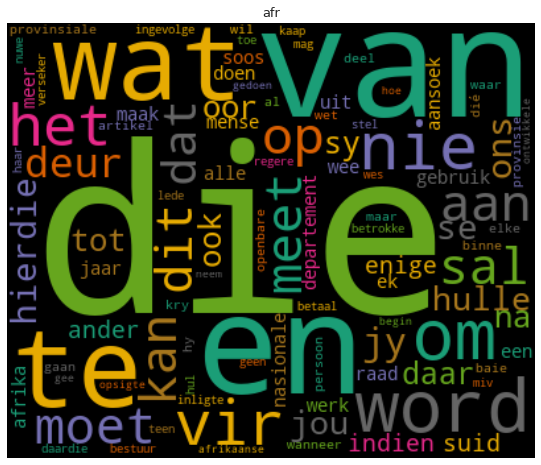

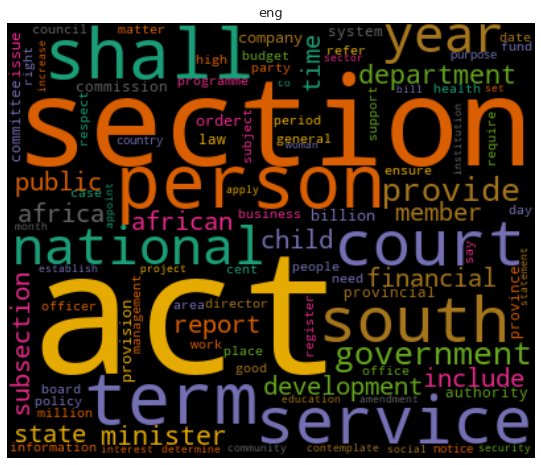

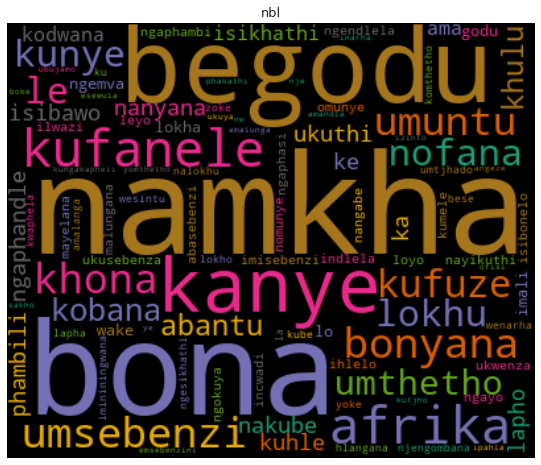

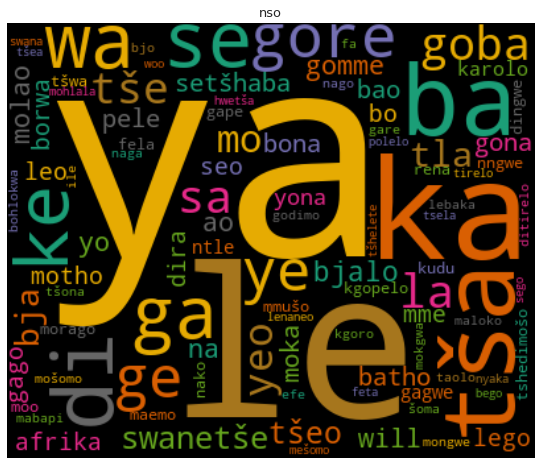

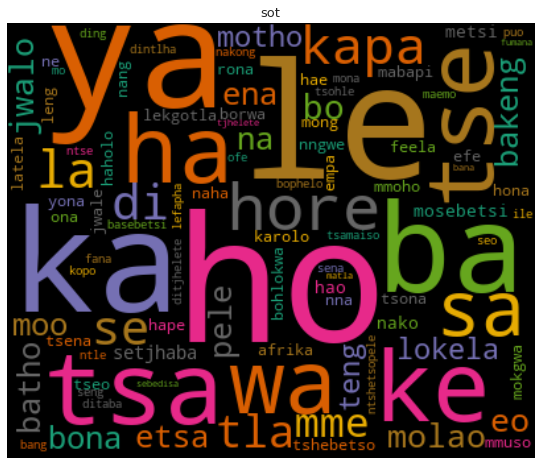

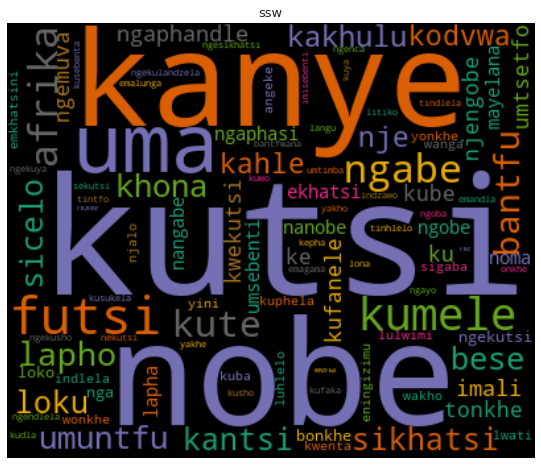

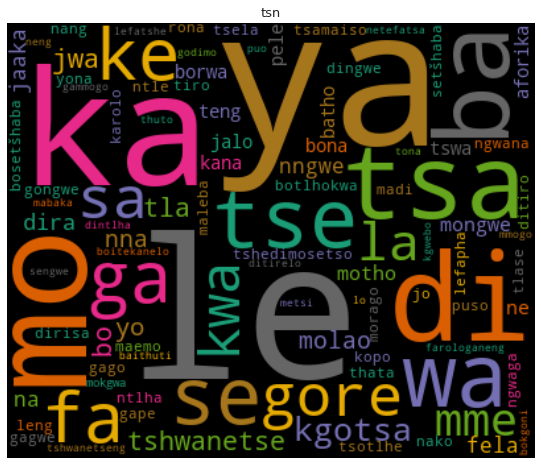

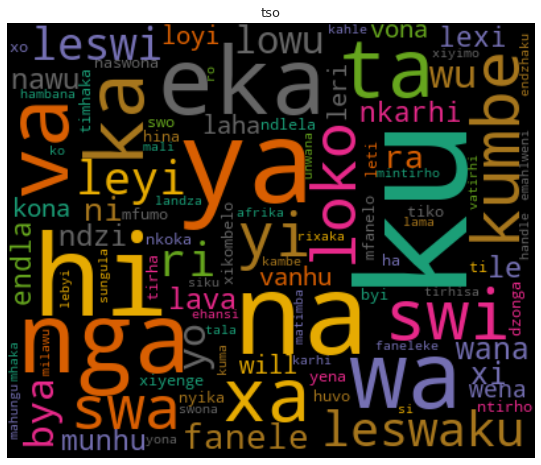

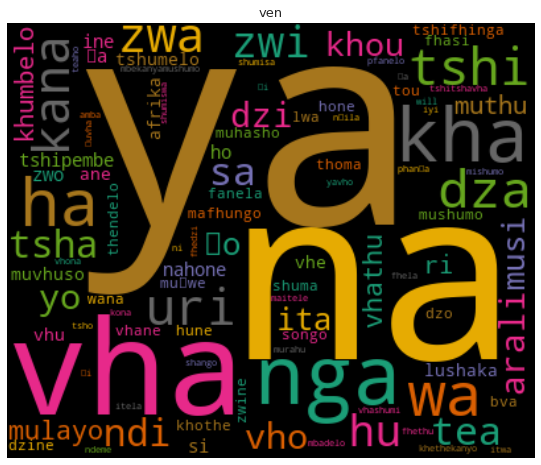

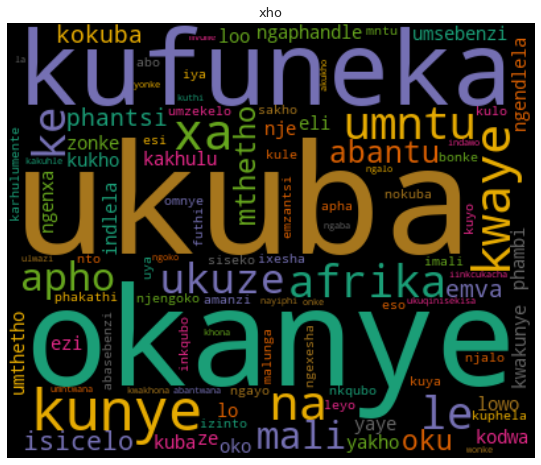

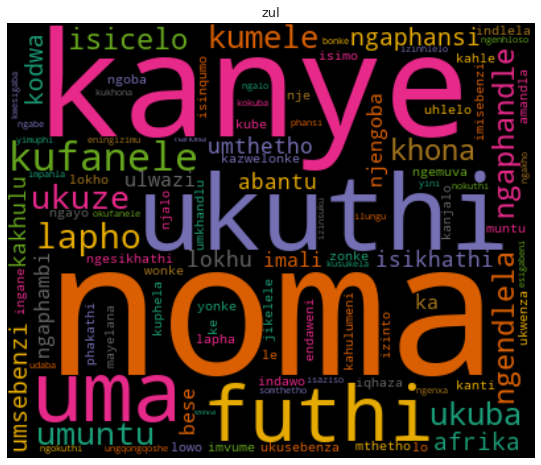

In [58]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=100,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
data2_dtm=data2_dtm.transpose()

# Plotting word cloud for each text
for lang_id,text in enumerate(data2_dtm.columns):
  generate_wordcloud(data2_dtm[text].sort_values(ascending=False),text)

## **Data Processing/Engineering**
* Split Train dataset


In [59]:
#define our X variable and Y variable in other words our feature and target variables
x = np.array(data["text"]) #feature/independent variable
y = np.array(data["lang_id"])  #target/dependent variable

cv = CountVectorizer() #not bad calling our countvectorizer package again as it's a our modelling  phase
X = cv.fit_transform(x) #using fit_transform to transform our independent va
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=20)

In [60]:
test_t = cv.transform(df['text'])

## **Modelling**


>>
*   Multinomial Naives Bayes
*   Random Forest Classifier
*   Support Vector Machine Classifier
*   XGBOOST Classifier


> *   Multinomial Naives Bayes

In [61]:
#using MNB to train model
model = MultinomialNB() #calling model library
model.fit(X_train,y_train) #fitting train data to model
pred = model.predict(X_test) #making a prediction of X_test
print(classification_report(y_test, pred)) #get classification report of our model performance after training

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       522
         eng       1.00      1.00      1.00       599
         nbl       1.00      1.00      1.00       463
         nso       1.00      1.00      1.00       586
         sot       1.00      1.00      1.00       574
         ssw       1.00      1.00      1.00       472
         tsn       1.00      1.00      1.00       590
         tso       1.00      1.00      1.00       582
         ven       1.00      1.00      1.00       495
         xho       1.00      1.00      1.00       509
         zul       1.00      1.00      1.00       598

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990



>>Multinomial NB gave an accuracy score  of 100%

>  

* Random Forest Classifier
   




In [65]:
#using RF to train model
rf_clf = RandomForestClassifier(n_estimators=100) # Create Random Forest classifer object
rf_clf = rf_clf.fit(X_train,y_train) # Fit/Train Random Forest Classifer on training set
pred = rf_clf.predict(X_test) #making a prediction of X_test
print(classification_report(y_test, pred)) #get classification report of our model performance after training

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       522
         eng       0.99      1.00      1.00       599
         nbl       0.98      0.93      0.95       463
         nso       1.00      1.00      1.00       586
         sot       1.00      1.00      1.00       574
         ssw       0.99      0.96      0.97       472
         tsn       1.00      1.00      1.00       590
         tso       1.00      1.00      1.00       582
         ven       1.00      1.00      1.00       495
         xho       0.98      0.98      0.98       509
         zul       0.92      0.97      0.94       598

    accuracy                           0.99      5990
   macro avg       0.99      0.98      0.99      5990
weighted avg       0.99      0.99      0.99      5990



>> Random forest gave an accuracy score of 99%

> 

*   Support Vector Machine Classifier



In [63]:
##using SVC to train model
model_svc = svm.SVC(kernel='linear') #calling model library
model_svc.fit(X_train,y_train) #fitting train data to model
pred = model_svc.predict(X_test) #making a prediction of X_test
print(classification_report(y_test, pred)) #get classification report of our model performance after training

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       522
         eng       1.00      1.00      1.00       599
         nbl       0.98      0.98      0.98       463
         nso       0.99      0.99      0.99       586
         sot       1.00      1.00      1.00       574
         ssw       0.99      1.00      0.99       472
         tsn       1.00      0.99      0.99       590
         tso       1.00      1.00      1.00       582
         ven       1.00      1.00      1.00       495
         xho       1.00      0.99      1.00       509
         zul       0.99      0.99      0.99       598

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990



>> SVC a member of the Support Vector machines gave an accuracy score of 100% also

In [66]:
#using xgboost to train model
xgb_model = xgb.XGBClassifier() #calling model library
xgb_model.fit(X_train,y_train) #fitting train data to model
pred = xgb_model.predict(X_test) #making a prediction of X_test
print(classification_report(y_test, pred)) #get classification report of our model performance after training

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       522
         eng       1.00      1.00      1.00       599
         nbl       0.95      0.83      0.89       463
         nso       0.99      0.99      0.99       586
         sot       1.00      1.00      1.00       574
         ssw       0.99      0.86      0.92       472
         tsn       0.99      0.99      0.99       590
         tso       1.00      1.00      1.00       582
         ven       1.00      1.00      1.00       495
         xho       0.83      0.97      0.89       509
         zul       0.86      0.91      0.88       598

    accuracy                           0.96      5990
   macro avg       0.96      0.96      0.96      5990
weighted avg       0.96      0.96      0.96      5990



### Now let’s use this model to detect the language of a text by taking a user input

In [ ]:
#taking user input to check the performance of our model with actual data
user = input("Enter a Text: ") #user's input
data = cv.transform([user]).toarray() #using countvectorizer to convert user's input
output = model.predict(data) #using one of our best models(MNB or SVC: here we used MNB) to make prediction
print(output) #printing output before we get our result

So as you can see that the model performs well. One thing to note here is that this model can only detect the languages mentioned in the dataset.

# **Conclusion**

>>  We used four models to see which performed better and from all four models: multinomial Naive Bayes and SVM classifier performed well with an accuracy score of 100% followed by Random Forest with 99% Accuracy. XGBOOST was the least performing model amongst the four classification model with a 96% accuracy score.<br><br> Using machine learning for language identification was a difficult task a few years ago because there was not a lot of data on languages, but with the availability of data with ease, several powerful machine learning models are already available for language identification.

#**Refrence**

>

*   [Language Detection with Machine Learning](https://thecleverprogrammer.com/2021/10/30/language-detection-with-machine-learning/)
*   [A Beginner’s Guide to Exploratory Data Analysis (EDA) on Text Data (Amazon Case Study)](https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/)
* [Naive Bayes and Hyperparameter Optimization](https://bait509-ubc.github.io/BAIT509/lectures/lecture6.html)
* [Copy of Multi Topic Text Classification With Deep Learning Models](https://colab.research.google.com/drive/1CUtLnA1kEVj5wtPmJThSo28sA5QV-j9L)
* [Classification Report in Machine Learning](https://thecleverprogrammer.com/2021/07/07/classification-report-in-machine-learning/#:~:text=A%20classification%20report%20is%20a,this%20article%20is%20for%20you.)



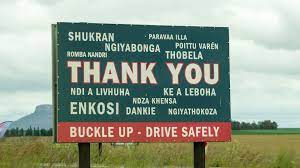